# Introduction

Our group has decided to look into **safety** as our metric of choice.

Safety can be measured in a variety of different ways, and thus was perfect for us because it allowed us to explore a ton of different submetrics and choose whichever dataset we drawn interest to.  


# Part 1: Premature Death by Neighborhood

A premature death is defined as a death that occurs before the age of 75.  The CDC estimates that up to 40% of premature deaths in the United States are preventable.  Common causes and risk factors include homicide, heart disease, and poor air quality as well as social maladies, such as poverty and racial segregation (source: https://ajph.aphapublications.org/doi/full/10.2105/AJPH.2010.300086).  This analysis examines the median age of death in Pittsburgh to get an understanding of where premature deaths are concentrated in the city.  Those neighborhoods would be excluded from being considered among the safest/best in Pittsburgh.

This project specifically compares the median age of death between the two largest groups in Pittsburgh, Blacks and Whites.  The reason for analysis-by-race is that disparate outcomes by race could suggest that a neighborhood isn't safe for a particular group.  It should be stressed that "safe" doesn't just mean free of violence - it can mean, for instance, a neighborhood whose residents have access to adequate healthcare.  Think "safe space."

It's expected for this submetric to return several Pittsburgh neighborhoods as best/safest, so, for further pruning, the best neighborhood in Pittsburgh is one whose median age of death for Blacks and Whites is:

1. Non-premature
2. Comparable
3. Relatively high (e.g., 80s)
 
**Important note:** the age at which a death is considered premature is based on the *average* age of death for a population (75 for Americans), not the median.  Ideally, a comparison would be done with averages, but WPRDC doesn't have a dataset for the average age of death in Pittsburgh and probably for good reason: the sampled populations in these neighborhoods are so small that averages would skew the data.  

In any case, it's best to say that the comparison between median and average is a loose one.


#### Analysis

Begin by reading the dataset:

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gdf

file = pd.read_csv("median_age_of_death.csv")
file


,NEIGHBORHOOD,BLACKdeaths,Black MD AGE AT DEATH,WHITEdeaths,White MD AGE AT DEATH,TOTALdeaths*,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0,0.0,0.0,0.0
1,CHATEAU,0.0,0.0,2.0,NaN,2.0,NaN
2,NORTH SHORE,0.0,0.0,4.0,NaN,5.0,80.0
3,ALLEGHENY WEST,3.0,NaN,4.0,NaN,8.0,65.0
4,SAINT CLAIR,5.0,67.5,5.0,67.5,10.0,67.5
...,...,...,...,...,...,...,...
87,CARRICK,35.0,59.4,622.0,77.0,678.0,75.9
88,BROOKLINE,13.0,61.2,723.0,78.1,750.0,77.8
89,SQUIRREL HILL SOUTH,58.0,83.2,721.0,86.2,802.0,85.9
90,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Plotting the frame shows what the charted data looks like.  A stacked, horizontal bar chart was chosen for easier viewing.

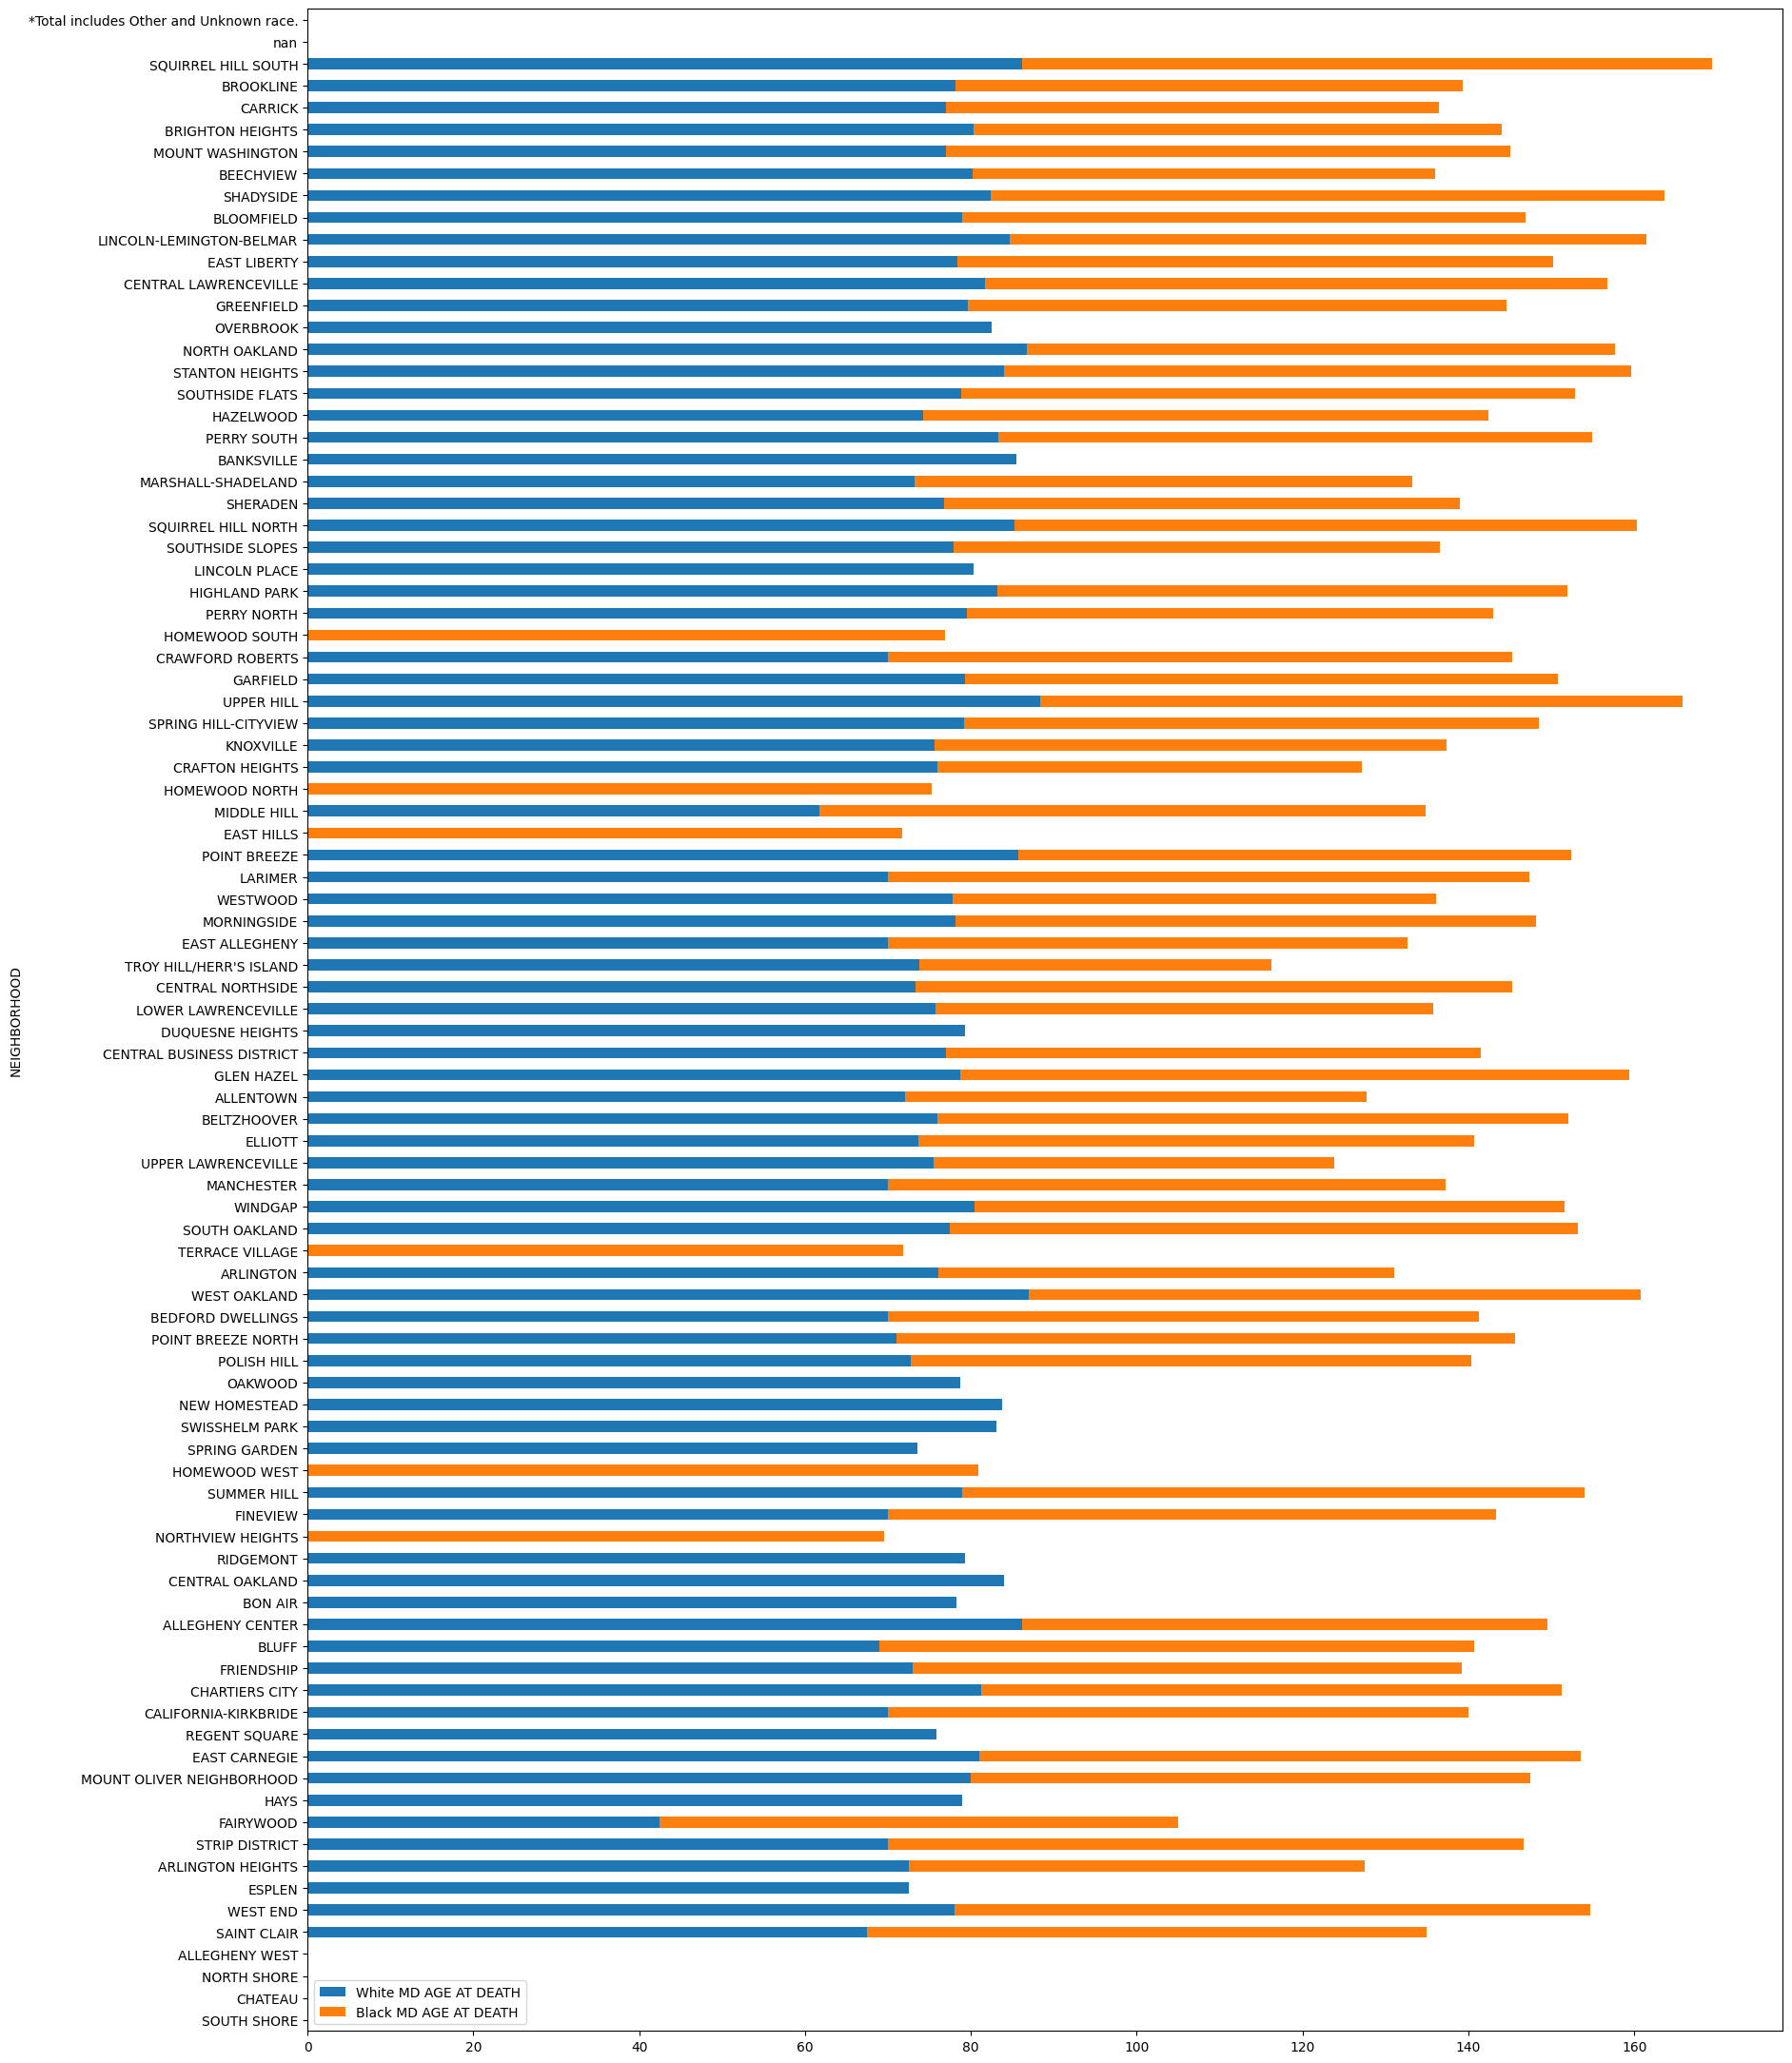

In [188]:
graph = file.plot.barh(x="NEIGHBORHOOD",
y=['White MD AGE AT DEATH', 'Black MD AGE AT DEATH'],
figsize=(20,file.shape[0] * 0.3), 
legend=True, 
stacked='true')

Next, the dataset is cleaned up by filtering it for the desired columns: neighborhood, a neighborhood's Black and White median age of death, and a neighborhood's total median age of death.  The last column will be used for plotting with geopandas.  

In [198]:
file = pd.read_csv("median_age_of_death.csv", usecols=["NEIGHBORHOOD", "Black MD AGE AT DEATH", "White MD AGE AT DEATH", "TOTAL MD AGE AT DEATH"])
file

,NEIGHBORHOOD,Black MD AGE AT DEATH,White MD AGE AT DEATH,TOTAL MD AGE AT DEATH
0,SOUTH SHORE,0.0,0.0,0.0
1,CHATEAU,0.0,NaN,NaN
2,NORTH SHORE,0.0,NaN,80.0
3,ALLEGHENY WEST,NaN,NaN,65.0
4,SAINT CLAIR,67.5,67.5,67.5
...,...,...,...,...
87,CARRICK,59.4,77.0,75.9
88,BROOKLINE,61.2,78.1,77.8
89,SQUIRREL HILL SOUTH,83.2,86.2,85.9
90,NaN,NaN,NaN,NaN


Next, the new dataframe is converted into a list.  A loop checks for the condition of non-premature death: if a neighborhood's Black **and** White decedents have a median age of death greater than or equal to 75, the neighborhood and its corresponding values will be stored in the list, over75; else, the data points will be added to another list called under75.

In [207]:
li = file.values.tolist()
over75 = []
under75 = []

for hood in li:
    if(hood[1] >= 74.5 and hood[2] >= 74.5):
        over75.append(hood[0])
        over75.append(hood[1])
        over75.append(hood[2])
        over75.append(hood[3])
    else:
        under75.append(hood[0])
        under75.append(hood[1])
        under75.append(hood[2])
        under75.append(hood[3])


A sample of "non-premature" neighborhoods:

In [222]:
over75

['WEST END',
 76.7,
 78.0,
 77.5,
 'SUMMER HILL',
 75.0,
 79.0,
 78.3,
 'SOUTH OAKLAND',
 75.7,
 77.5,
 77.1,
 'BELTZHOOVER',
 76.1,
 76.0,
 76.6,
 'GLEN HAZEL',
 80.7,
 78.7,
 79.8,
 'UPPER HILL',
 77.4,
 88.4,
 81.7,
 'SQUIRREL HILL NORTH',
 75.0,
 85.3,
 85.0,
 'STANTON HEIGHTS',
 75.6,
 84.0,
 80.5,
 'CENTRAL LAWRENCEVILLE',
 75.0,
 81.7,
 81.3,
 'LINCOLN-LEMINGTON-BELMAR',
 76.7,
 84.7,
 78.8,
 'SHADYSIDE',
 81.2,
 82.4,
 82.1,
 'SQUIRREL HILL SOUTH',
 83.2,
 86.2,
 85.9]

There is a problem with this list: the data isn't in the correct format.  A neighborhood should be grouped with its three median ages.  This list is returning the items as discrete pieces of data.  The code below loops through the list and places elements into groups of four.  

In [220]:
non_prem_list = [over75[i:i+4] for i in range(0, len(over75), 4)]
prem_list1 = [under75[i:i+4] for i in range(0, len(under75), 4)] 

non_prem_list

[['WEST END', 76.7, 78.0, 77.5],
 ['SUMMER HILL', 75.0, 79.0, 78.3],
 ['SOUTH OAKLAND', 75.7, 77.5, 77.1],
 ['BELTZHOOVER', 76.1, 76.0, 76.6],
 ['GLEN HAZEL', 80.7, 78.7, 79.8],
 ['UPPER HILL', 77.4, 88.4, 81.7],
 ['SQUIRREL HILL NORTH', 75.0, 85.3, 85.0],
 ['STANTON HEIGHTS', 75.6, 84.0, 80.5],
 ['CENTRAL LAWRENCEVILLE', 75.0, 81.7, 81.3],
 ['LINCOLN-LEMINGTON-BELMAR', 76.7, 84.7, 78.8],
 ['SHADYSIDE', 81.2, 82.4, 82.1],
 ['SQUIRREL HILL SOUTH', 83.2, 86.2, 85.9]]

Both lists are merged for plotting in geopandas:

In [215]:
merge_lists = non_prem_list + prem_list1 #For plotting

Finally, non_prem_list will be converted to a dataframe and plotted as a stacked, horizontal bar chart:

In [217]:
convert = pd.DataFrame(non_prem_list, 
columns=['Neighborhood', 
         'Black MD Age', 
         'White MD Age', 
         'Total MD Age']).sort_values(by=["Total MD Age"], ascending=False)
convert

,Neighborhood,Black MD Age,White MD Age,Total MD Age
11,SQUIRREL HILL SOUTH,83.2,86.2,85.9
6,SQUIRREL HILL NORTH,75.0,85.3,85.0
10,SHADYSIDE,81.2,82.4,82.1
5,UPPER HILL,77.4,88.4,81.7
8,CENTRAL LAWRENCEVILLE,75.0,81.7,81.3
7,STANTON HEIGHTS,75.6,84.0,80.5
4,GLEN HAZEL,80.7,78.7,79.8
9,LINCOLN-LEMINGTON-BELMAR,76.7,84.7,78.8
1,SUMMER HILL,75.0,79.0,78.3
0,WEST END,76.7,78.0,77.5


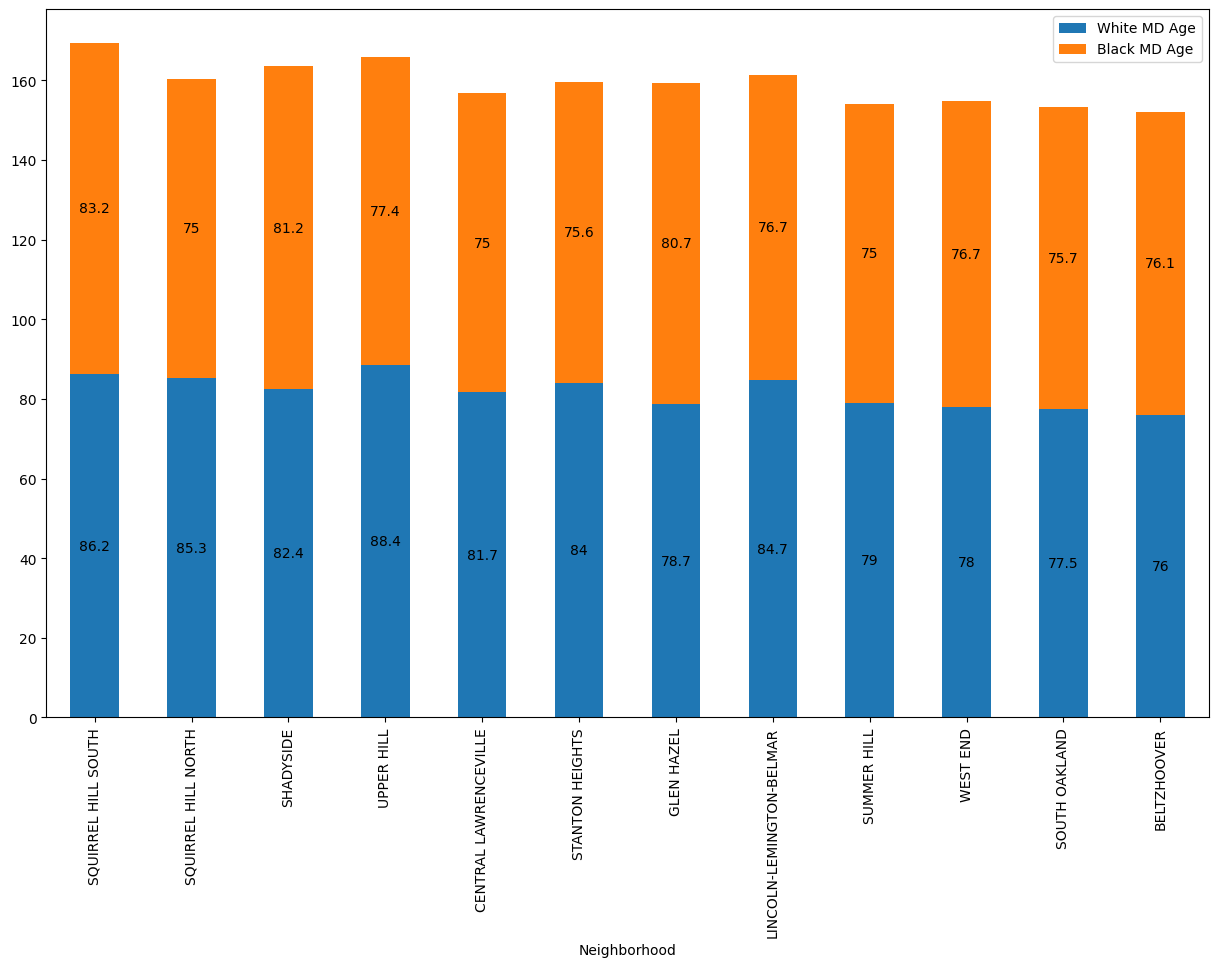

In [223]:
ax = convert.plot.bar(x="Neighborhood", y=["White MD Age", "Black MD Age"], figsize=(15,file.shape[0] * 0.1), stacked=True)
plt.legend(loc="upper right")
plt.show

for container in ax.containers:
   ax.bar_label(container, label_type='center')

#### Results

Because the gap in Black-White median age of death is small, and because BOTH groups have a high median age of death, **Squirrel Hill South** is the best neighborhood in Pittsburgh.  

Plotting the total median age of death for the top neighborhoods gives another perspective in how they rank.  For most people, this is easier to visually understand, but this chart is slightly deceptive. Take, for example, Squirrel Hill North.  The neighborhood ranks high, but what isn't shown is the 10-year gap in median age of death between Blacks and Whites.  For that matter, the Black median age of death is just barely 75.

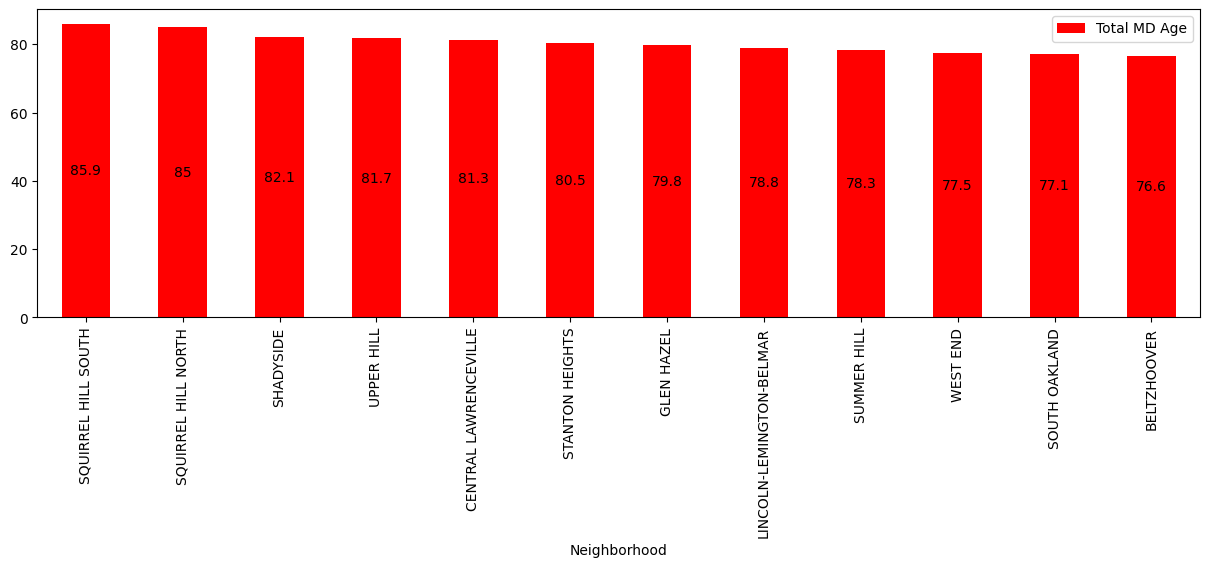

In [202]:
ax = convert.plot.bar(x="Neighborhood", y=["Total MD Age"], figsize=(15, 4), color='Red'
)
plt.legend(loc="upper right")
plt.show

for container in ax.containers:
   ax.bar_label(container, label_type='center')

Geopandas is used to create a neighborhood visualization.  Recall that merge_lists was created after splitting the dataset into two lists and combining them.   

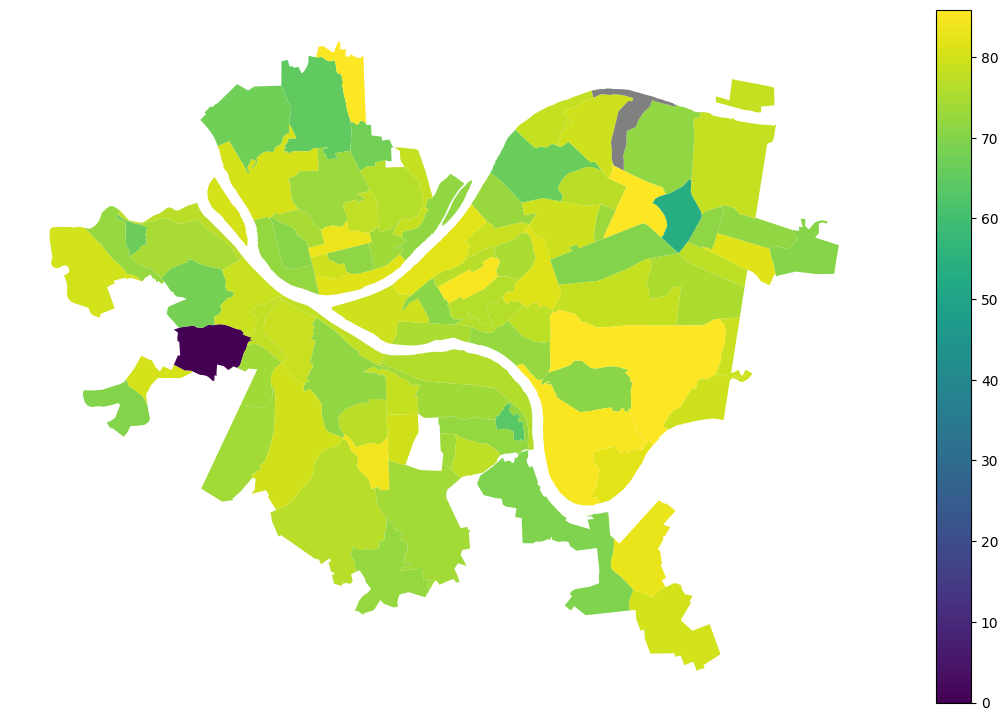

In [221]:
geo = gdf.read_file('Neighborhoods_.shp')

p = pd.DataFrame(merge_lists, 
columns=['Neighborhood', 
         'Black MD Age', 
         'White MD Age',
         'Total MD Age'])

f = geo.merge(p, left_index=True, right_index=True)

frame1 = gdf.GeoDataFrame(f)

frame1.plot(column='Total MD Age', 
#cmap='OrRd', 
figsize=(15, 9), 
legend=True, 
missing_kwds=dict(color='grey', label='No Data')
)
plt.axis('off')
plt.show()


### Winner: Squirrel Hill South

#### Final Thoughts

It's notable that out of 90 neighborhoods, Pittsburgh only has 11 where Blacks and Whites **both** live past the age of premature death.  


# Part 2: Arrest Data and Firearm Seizure Data

Since our group metric is safety, I chose two datasets to look at- arrest data and firearm seizure data. 

Arrest data can give us a general idea of crime in an area, but may be skewed by the level of crime. In particular, there are hundreds of different crimes recorded in this dataset, and it would be difficult to "rank" the crimes. Instead, I chose to view the overall trends in each neighborhood. Instead of just looking at which neighborhood has the "most crime", we can look at whether the crime rates in neighborhoods are high or low and increasing or decreasing at the same time.

This seems to be an appropriate way to analyze crime data, because crime is so variable and intertwined with social factors.

In [83]:
#import packages
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar, geom_line
import datetime

In [84]:
#read in arrest data
arrest_data = pd.read_csv("arrest-data.csv")

In [85]:
#convert long date string into just the year so we can easily sort and graph
for index, row in arrest_data.iterrows():
    year = int(row["ARRESTTIME"][:4])
    arrest_data.loc[index,"ARRESTTIME"] = year

In [86]:
#sort by arrest year
sorted_arrests_by_date = arrest_data.sort_values(["ARRESTTIME"], ascending=False)
sorted_arrests_by_date.head()

,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
58321,2052033,22097280,49.0,M,B,2022,"600 Block First AV Pittsburgh, PA 15219",2701 Simple Assault.,"7200 Block Frankstown AV Pittsburgh, PA 15208",Homewood North,5,1302.0,9.0,2.0,-79.896270,40.457389
54890,2047010,22028003,16.0,F,B,2022,"600 Block 1ST AV PITTSBURGH, PA 15219","2701(a)(1) Simple Assault - Intent., Know., Re...","500 Block N HIGHLAND AV PITTSBURGH, PA 15206",Shadyside,5,708.0,8.0,2.0,-79.924945,40.453011
54873,2046955,22047498,34.0,M,W,2022,"S Fairmount ST & Roup AV Pittsburgh, PA 15232",503.04 Traffic Control Devices / 3802(a)(1) DU...,"S Fairmount ST & Roup AV Pittsburgh, PA 15232",Friendship,5,807.0,7.0,2.0,-79.935493,40.459339
54874,2046956,22047500,29.0,M,B,2022,"600 Block 1st AV Pittsburgh, PA 15219",5505 Public Drunkenness / 5503(a)(1) DISORDERL...,"1700 Block E Carson ST Pittsburgh, PA 15203",South Side Flats,3,1702.0,3.0,3.0,-79.981872,40.428593
54875,2046957,22047598,33.0,F,B,2022,"800 Block Proctor WY Pittsburgh, PA 15210",2701 Simple Assault.,"800 Block Proctor WY Pittsburgh, PA 15210",Allentown,3,1803.0,3.0,5.0,-79.993673,40.420400


In [87]:
#group by year and neighborhood, get number of arrests per year per neighborhood
sorted_arrests_by_date = sorted_arrests_by_date.groupby(by=["ARRESTTIME","INCIDENTNEIGHBORHOOD"]).size()

In [88]:
#view data
sorted_arrests_by_date.head(15)

ARRESTTIME  INCIDENTNEIGHBORHOOD     
1998        Central Business District    1
2007        Homewood South               1
            Spring Hill-City View        1
            Westwood                     1
2008        Greenfield                   1
2010        Central North Side           2
2011        East Liberty                 1
            South Side Flats             1
2012        Carrick                      1
            East Liberty                 1
2013        Beechview                    1
            Mount Washington             1
            Upper Hill                   1
2014        Beechview                    7
            Bloomfield                   1
dtype: int64

In [89]:
#convert into a more graphable form by creating a count column
test_test = sorted_arrests_by_date.reset_index()
test_test["count"] = test_test[0]
test_test.pop(0)
test_test.head(15)

,ARRESTTIME,INCIDENTNEIGHBORHOOD,count
0,1998,Central Business District,1
1,2007,Homewood South,1
2,2007,Spring Hill-City View,1
3,2007,Westwood,1
4,2008,Greenfield,1
5,2010,Central North Side,2
6,2011,East Liberty,1
7,2011,South Side Flats,1
8,2012,Carrick,1
9,2012,East Liberty,1


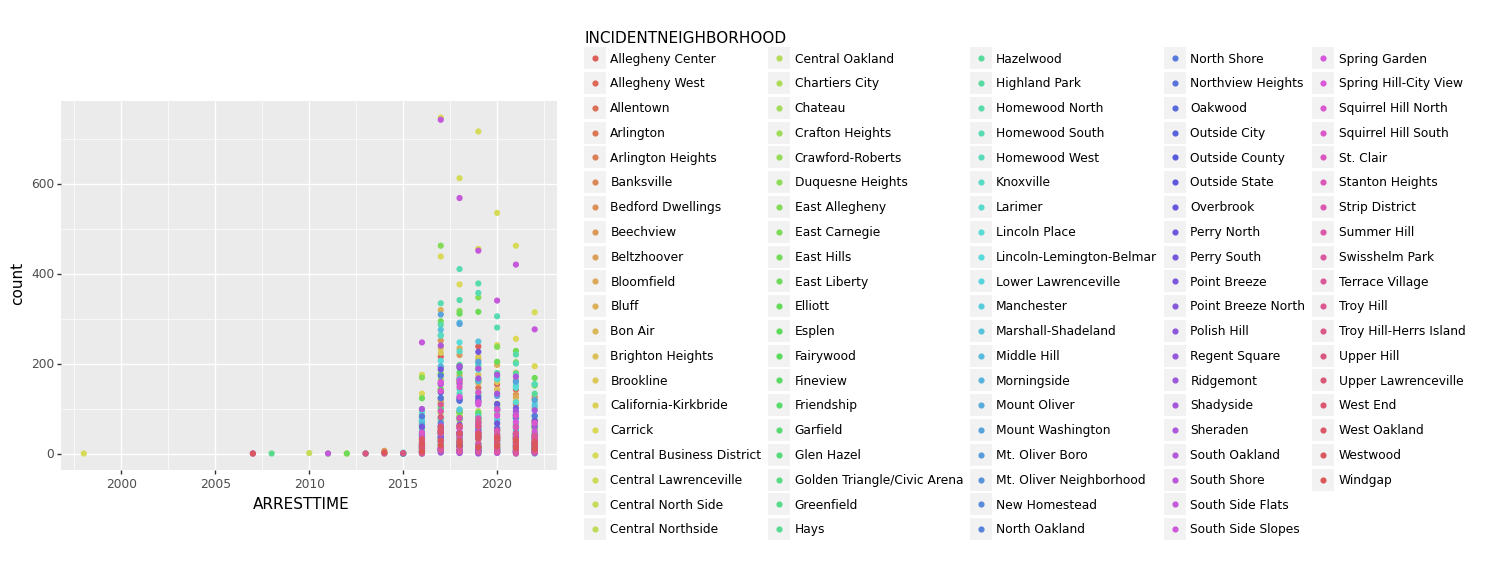

<ggplot: (8789662301760)>

In [90]:
#plot using plotnine
ggplot(test_test,aes(x="ARRESTTIME",y="count"))+geom_point(aes(color="INCIDENTNEIGHBORHOOD"))

Clearly, this visualization is too cluttered to gather any meaningful results. For these purposes, I will ignore the neighborhoods with a "normal" level of crime and focus on those with high and low crime rates.

In [91]:
#now want to step back, pick only the most relevant neighborhoods
#need to drop earlier years, pick only the top 15 neighborhoods with most crimes total
crime_ridden_neighborhoods = arrest_data.groupby("INCIDENTNEIGHBORHOOD").size().reset_index().sort_values(by=0,ascending=False).head(15)

In [92]:
crime_ridden_neighborhoods = crime_ridden_neighborhoods.reset_index()

In [93]:
#again, convert into a more graphable form
crime_ridden_neighborhoods.head()

,index,INCIDENTNEIGHBORHOOD,0
0,16,Central Business District,3570
1,78,South Side Flats,3053
2,15,Carrick,2102
3,26,East Allegheny,1893
4,43,Homewood South,1863


In [94]:
#make a list of the 15 neighborhoods with the most crime recorded
crime_neighborhood_list = list(crime_ridden_neighborhoods["INCIDENTNEIGHBORHOOD"])

In [95]:
#only use data points coming from those high crime neighborhoods
new_test_test = test_test[test_test["INCIDENTNEIGHBORHOOD"].isin(crime_neighborhood_list)]

In [98]:
#due to low number of data points from before 2016, get rid of them so we can visualize recent trend
final_test_test = new_test_test[new_test_test["ARRESTTIME"] >= 2016]

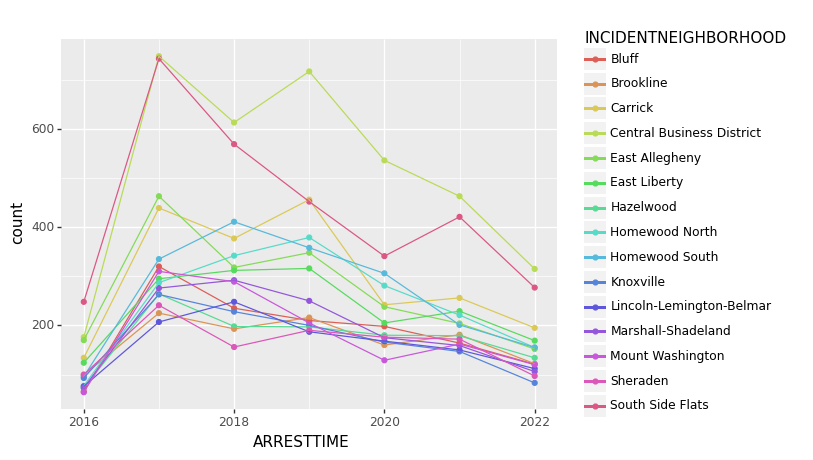

<ggplot: (8789656754999)>

In [99]:
#graph crime trends of 15 highest crime neighborhoods
ggplot(final_test_test,aes(x="ARRESTTIME",y="count"))+geom_point(aes(color="INCIDENTNEIGHBORHOOD"))+geom_line(aes(group="INCIDENTNEIGHBORHOOD",color="INCIDENTNEIGHBORHOOD"))

Looking at the highest crime neighborhoods, we can see there are at least 15 neighborhoods with 100 arrests per year or more. In particular, the central business district and the South Side Flats have extraordinarily high numbers of arrests. This won't tell us the "best neighborhood", but it can help us rule out many neighborhoods. 

One interesting thing to note is the sharp decline in arrests since 2019, the beginning of the pandemic.

In [ ]:
#now, let's do the same thing with the lowest crime neighborhoods

In [147]:
crime_free_neighborhoods = arrest_data.groupby("INCIDENTNEIGHBORHOOD").size().reset_index().sort_values(by=0,ascending=True).head(20)

In [148]:
crime_free_neighborhoods = crime_free_neighborhoods.reset_index()

In [149]:
crime_free_neighborhoods.head()

,index,INCIDENTNEIGHBORHOOD,0
0,57,Mt. Oliver Neighborhood,2
1,91,Troy Hill-Herrs Island,6
2,56,Mt. Oliver Boro,18
3,19,Central Northside,23
4,73,Ridgemont,32


In [150]:
crime_free_neighborhood_list = list(crime_free_neighborhoods["INCIDENTNEIGHBORHOOD"])

In [151]:
crime_free_df = test_test[test_test["INCIDENTNEIGHBORHOOD"].isin(crime_free_neighborhood_list)]

In [154]:
crime_free_df_final = crime_free_df[(crime_free_df["ARRESTTIME"] >= 2016) & (crime_free_df["count"]<80)]

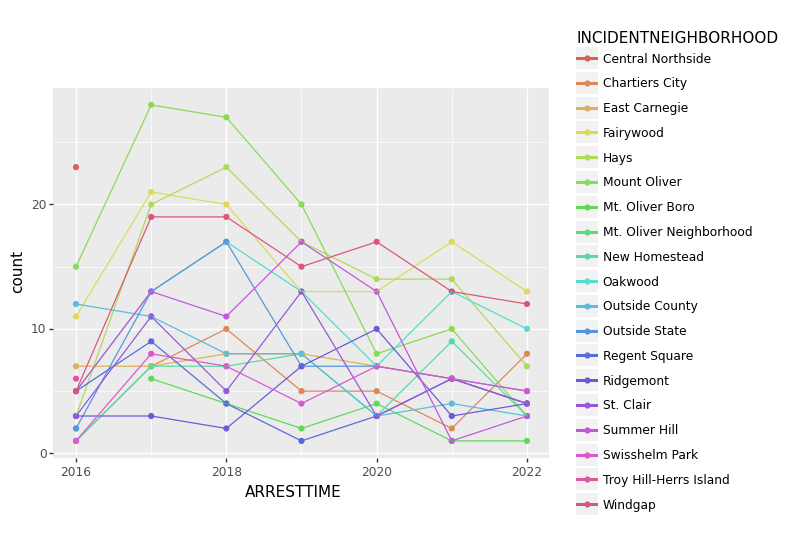

<ggplot: (8789665596504)>

In [155]:
ggplot(crime_free_df_final,aes(x="ARRESTTIME",y="count"))+geom_point(aes(color="INCIDENTNEIGHBORHOOD"))+geom_line(aes(group="INCIDENTNEIGHBORHOOD",color="INCIDENTNEIGHBORHOOD"))

While this may look incomprehensible, the details don't matter as much as the scale. For any of these 20 neighborhoods, there have not been more than 25 arrests in a year in the last 6 years. If a neighborhood has only about 2 arrests per month or fewer on average, we can confidently say it is safe.

Now, let's switch datasets and look at the firearm dataset instead. We can look for similarities and differences and maybe learn something about the type of crime prevalent in different areas.

In [100]:
#read in second dataset
firearm_data = pd.read_csv("firearmdata.csv")


In [101]:
#view structure of data
firearm_data.head()

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN


In [105]:
#get number of guns seized per neighborhood per year
grouped_firearms = firearm_data.groupby(["year","neighborhood"])["total_count"].sum()

In [106]:
#view new grouped data
grouped_firearms.head()

year  neighborhood     
2015  Allegheny Center      2
      Allegheny West        1
      Allentown             9
      Arlington            10
      Arlington Heights     5
Name: total_count, dtype: int64

In [107]:
#convert into graphable form with count as a column
new_grouped_firearms = grouped_firearms.reset_index()

In [108]:
#view new data so we can graph properly
new_grouped_firearms.head()

,year,neighborhood,total_count
0,2015,Allegheny Center,2
1,2015,Allegheny West,1
2,2015,Allentown,9
3,2015,Arlington,10
4,2015,Arlington Heights,5


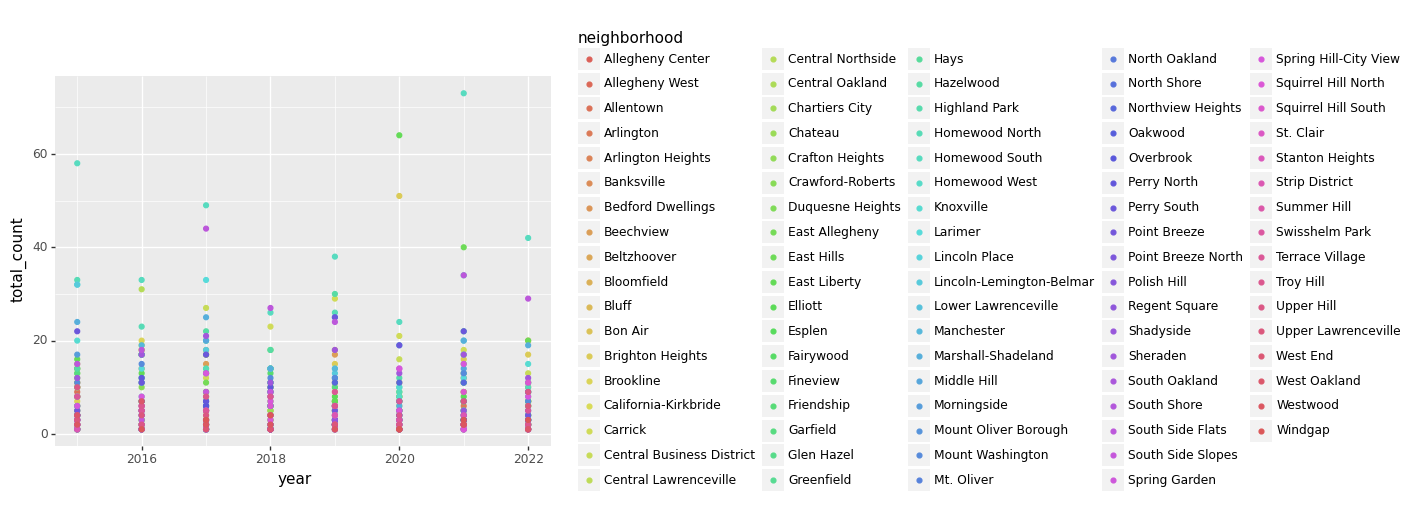

<ggplot: (8789655045145)>

In [109]:
#graph number of firearms seized per neighborhood per year
ggplot(new_grouped_firearms,aes(x="year",y="total_count"))+geom_point(aes(color="neighborhood"))

Looking at the firearm data, it is again difficult to see any meaningful trends, so we'll take the same approach and look at the neighborhoods on the extremes.

In [110]:
#group by neighborhood only and get total number of firearms seized in that neighborhood
most_gun_seizures = firearm_data.groupby("neighborhood")["total_count"].sum().reset_index()

In [112]:
#sort to get the neighborhoods with most guns seized
most_gun_seizures_sorted = most_gun_seizures.sort_values(by="total_count",ascending=False)

In [114]:
#isolate the neighborhoods with most gun seizures
most_gun_neighborhoods = most_gun_seizures_sorted.head(15)

In [116]:
#put those neighborhoods on a list
most_gun_neighborhood_list = list(most_gun_neighborhoods["neighborhood"])

In [117]:
#view list
most_gun_neighborhood_list

['Homewood South',
 'South Side Flats',
 'Homewood North',
 'Brighton Heights',
 'East Liberty',
 'Hazelwood',
 'Marshall-Shadeland',
 'Carrick',
 'Lincoln-Lemington-Belmar',
 'East Hills',
 'Perry South',
 'Larimer',
 'Central Business District',
 'Sheraden',
 'Knoxville']

In [119]:
#only use rows from high-seizure neighborhoods
most_gun_new_df = new_grouped_firearms[new_grouped_firearms["neighborhood"].isin(most_gun_neighborhood_list)]

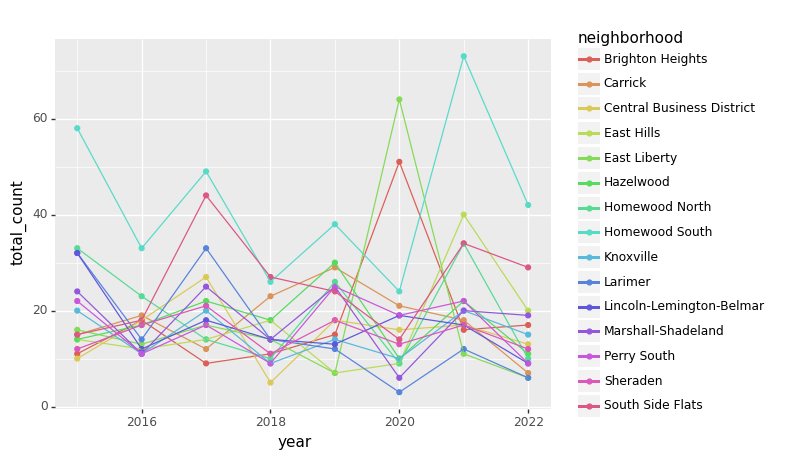

<ggplot: (8789661007797)>

In [120]:
#view trends of high-seizure neighborhoods
ggplot(most_gun_new_df,aes(x="year",y="total_count"))+geom_point(aes(color="neighborhood"))+geom_line(aes(group="neighborhood",color="neighborhood"))

In this graph, we can see that the scale is much smaller than we saw in the previous dataset. Even in the neighborhoods with the highest rates of firearm seizures, the average number of guns seized per month is 3 or fewer.

We can again suggest neighborhoods to avoid based on this graphic. Homewood, both north and south, stand out. However, we can also see a large spike in gun seizures in East Liberty and Brighton Heights in 2020. We can investigate this point:

In [180]:
firearm_data.sort_values(by="total_count",ascending=False).head(5)

,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
3213,"300 BLOCK S NEGLEY AVE PITTSBURGH, PA 15206",55,0,30,0,22,3,2020,9,2,East Liberty,9.0,11.0,4.200311e+10,2.0,5,3-8,40.465663,-79.929123
3205,"1800 BLOCK FAIRLEE ST PITTSBURGH, PA 15212",44,3,19,0,17,5,2020,9,1,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479008,-80.041643
2417,"1000 BLOCK SOUTH SIDE AVE PITTSBURGH, PA 15212",29,0,4,3,15,7,2019,2,2,NaN,NaN,NaN,4.200356e+10,NaN,1,3-21,40.440090,-79.880204
132,"700 BLOCK N HOMEWOOD AVE PITTSBURGH, PA 15208",24,0,10,6,3,5,2015,4,1,Homewood South,9.0,13.0,4.200313e+10,2.0,5,3-17,40.455629,-79.896675
526,"1600 BLOCK WORTHINGTON ST PITTSBURGH, PA 15206",19,1,12,2,3,1,2015,11,6,Lincoln-Lemington-Belmar,9.0,12.0,4.200356e+10,2.0,5,3-18,40.468372,-79.891701


As we can see, these spikes were due to two individuals who had 55 and 44 guns seized, respectively. This demonstrates an important point about the variability of data and the importance of not drawing large conclusions from small amounts of data.

In [156]:
fewest_gun_seizures_sorted = most_gun_seizures.sort_values(by="total_count",ascending=True)

In [173]:
fewest_gun_neighborhoods = fewest_gun_seizures_sorted.head(20)

In [174]:
fewest_gun_neighborhood_list = list(fewest_gun_neighborhoods["neighborhood"])

In [175]:
fewest_gun_neighborhood_list

['Swisshelm Park',
 'Summer Hill',
 'Mt. Oliver',
 'Regent Square',
 'Chartiers City',
 'Oakwood',
 'Friendship',
 'West End',
 'St. Clair',
 'Hays',
 'Mount Oliver Borough',
 'Fairywood',
 'Westwood',
 'Lincoln Place',
 'Esplen',
 'Banksville',
 'Arlington Heights',
 'Polish Hill',
 'Spring Garden',
 'Bon Air']

In [176]:
fewest_gun_new_df = new_grouped_firearms[new_grouped_firearms["neighborhood"].isin(fewest_gun_neighborhood_list)]

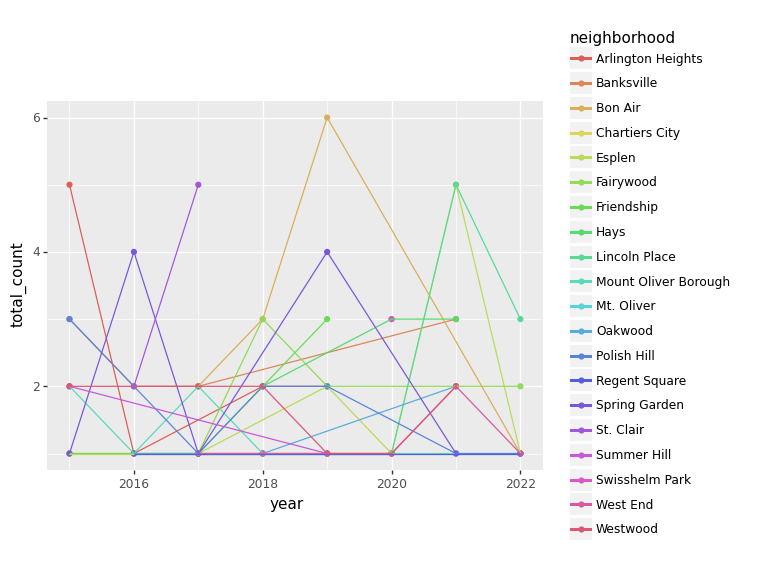

<ggplot: (8789653654791)>

In [177]:
ggplot(fewest_gun_new_df,aes(x="year",y="total_count"))+geom_point(aes(color="neighborhood"))+geom_line(aes(group="neighborhood",color="neighborhood"))

Again, we don't have to look at individual trends to gain insight from this graph. We can see that there are at least 20 neighborhoods with 6 or fewer gun seizures per year. In addition, many of these neighborhoods have gaps in their trends due to years without any seizures. This is certainly a positive indicator for those seeking neighborhoods with low rates of gun violence.

# Part 3: Reported Fire Incidents

The metric that I have decided to take a look at is the number of reported fire incidents. This is an important factor to consider because an area with a high rate of reported fires is definitely not considered to be the safest place around. 

In [156]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [167]:
#Read in dataset and only include necessary columns
df = pd.read_csv('fires.csv')
df = df[['neighborhood', 'type_description']]
df

,neighborhood,type_description
0,NaN,Building fire
1,NaN,Building fire
2,NaN,Passenger vehicle fire
3,Fineview,Passenger vehicle fire
4,Fairywood,Building fire
...,...,...
8952,Mount Washington,Fires in structure other than in a building
8953,Beechview,Building fire
8954,Middle Hill,"Cooking fire, confined to container"
8955,Garfield,Building fire


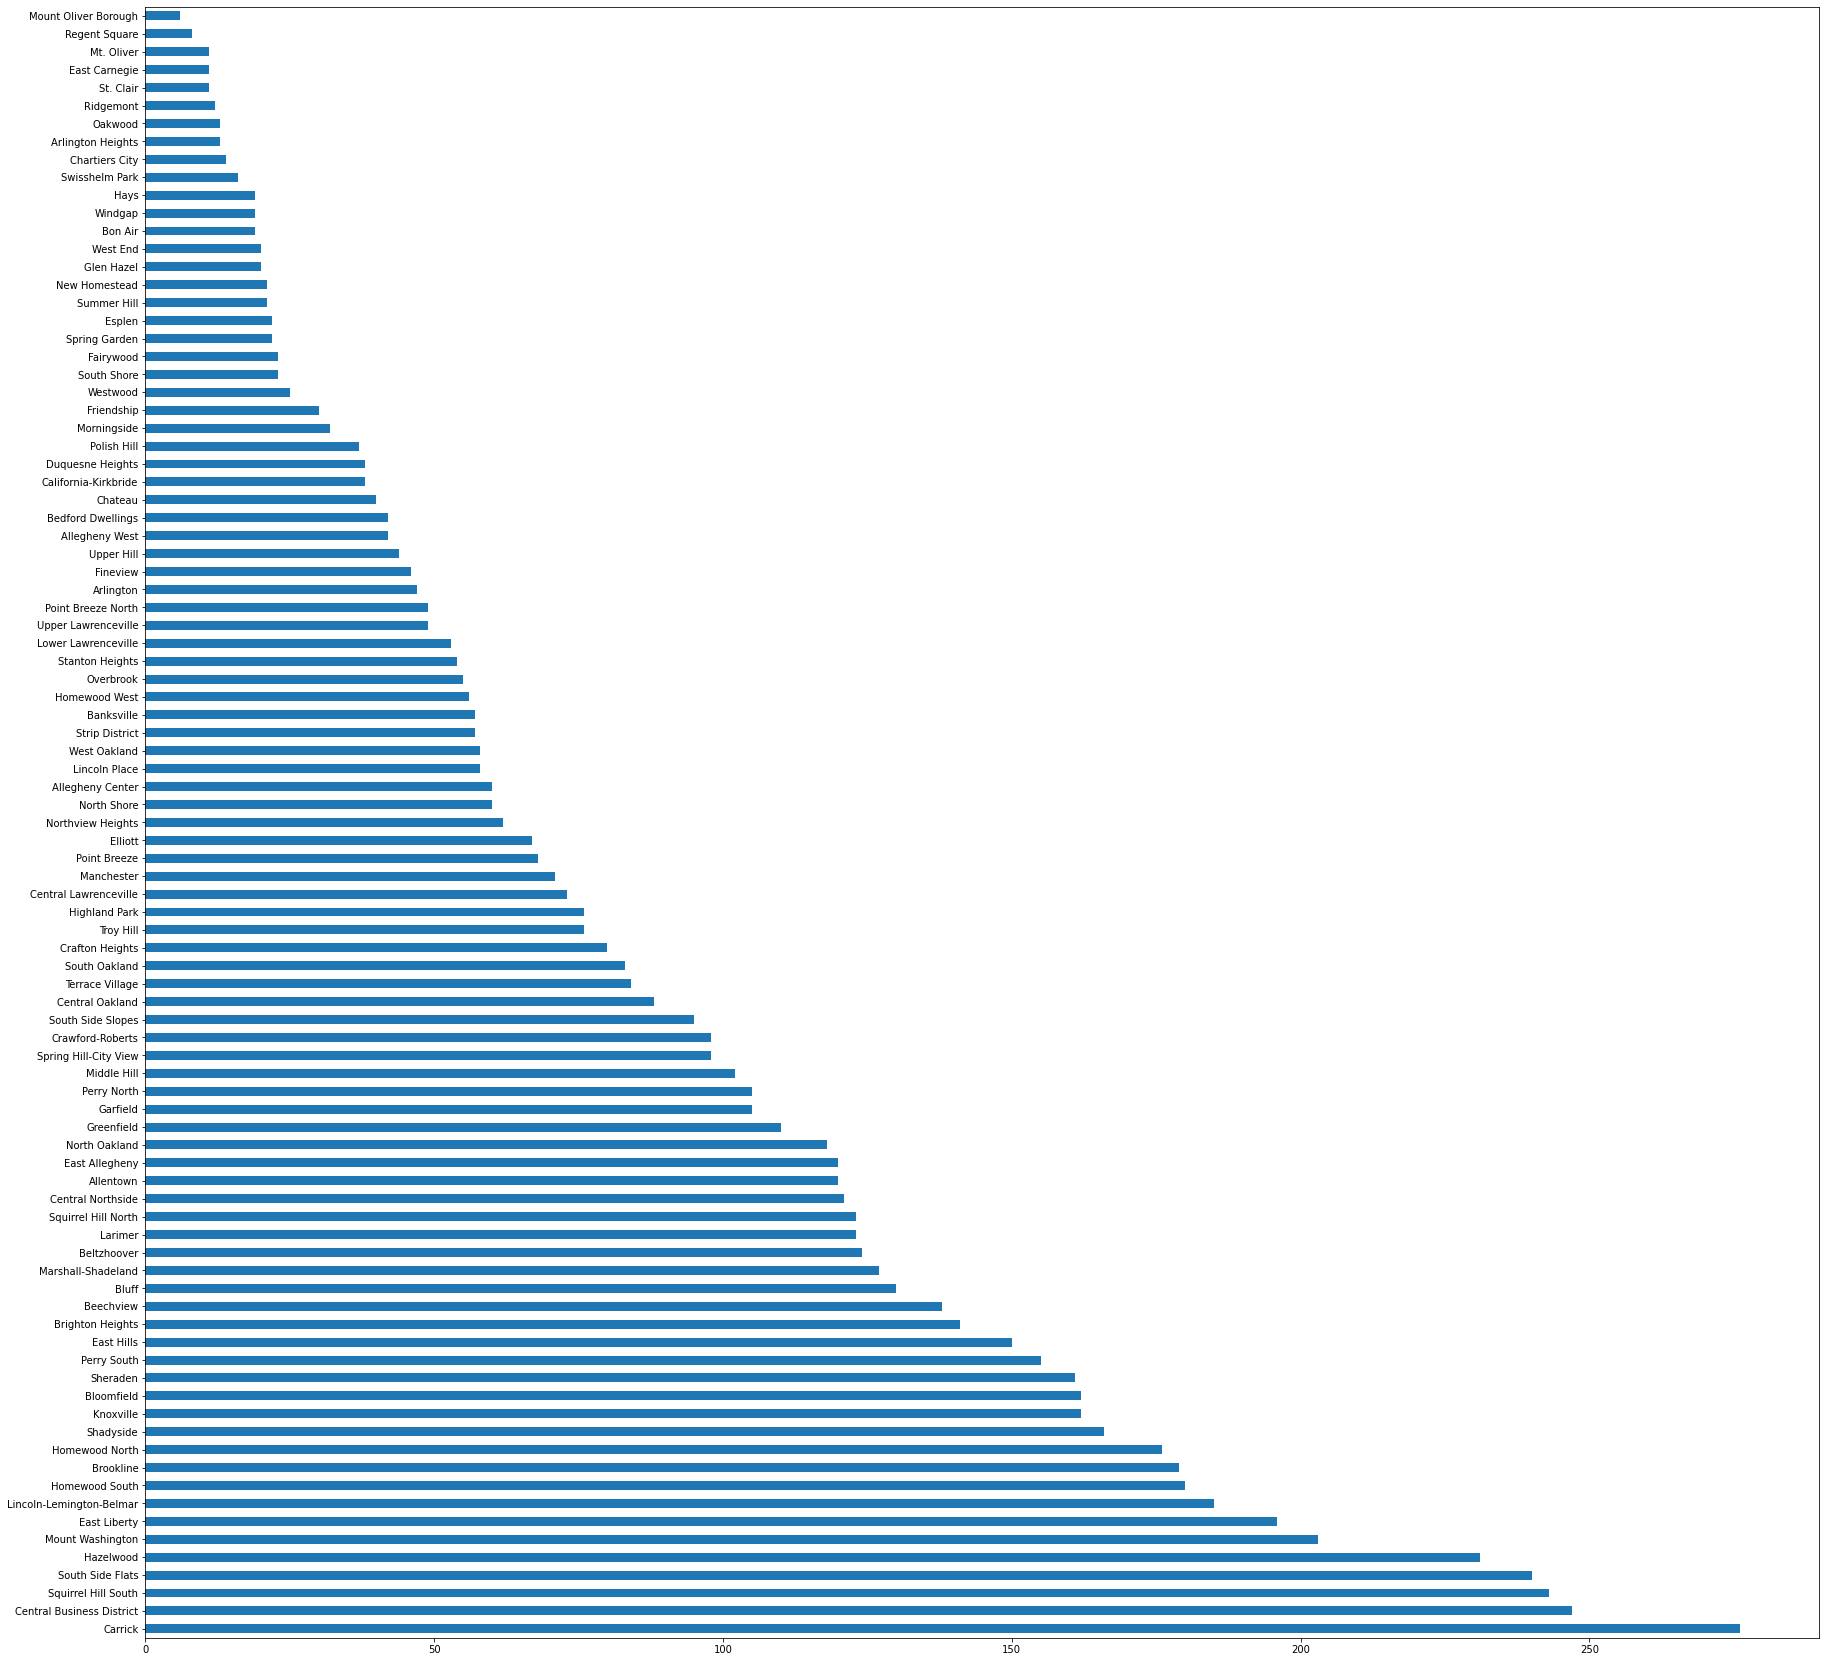

In [158]:
#plot initial bar graph
df['neighborhood'].value_counts().plot.barh(figsize=(30,30))

The bargraph above shows a view of the **total** reported fire incidents in each neighborhood. This can give us an initial look at what the best neighborhoods may consist of, **however** this chart considers any type of fire to be of equal value.. so a burnt poptart in the microwave is considered the same as a building fire.

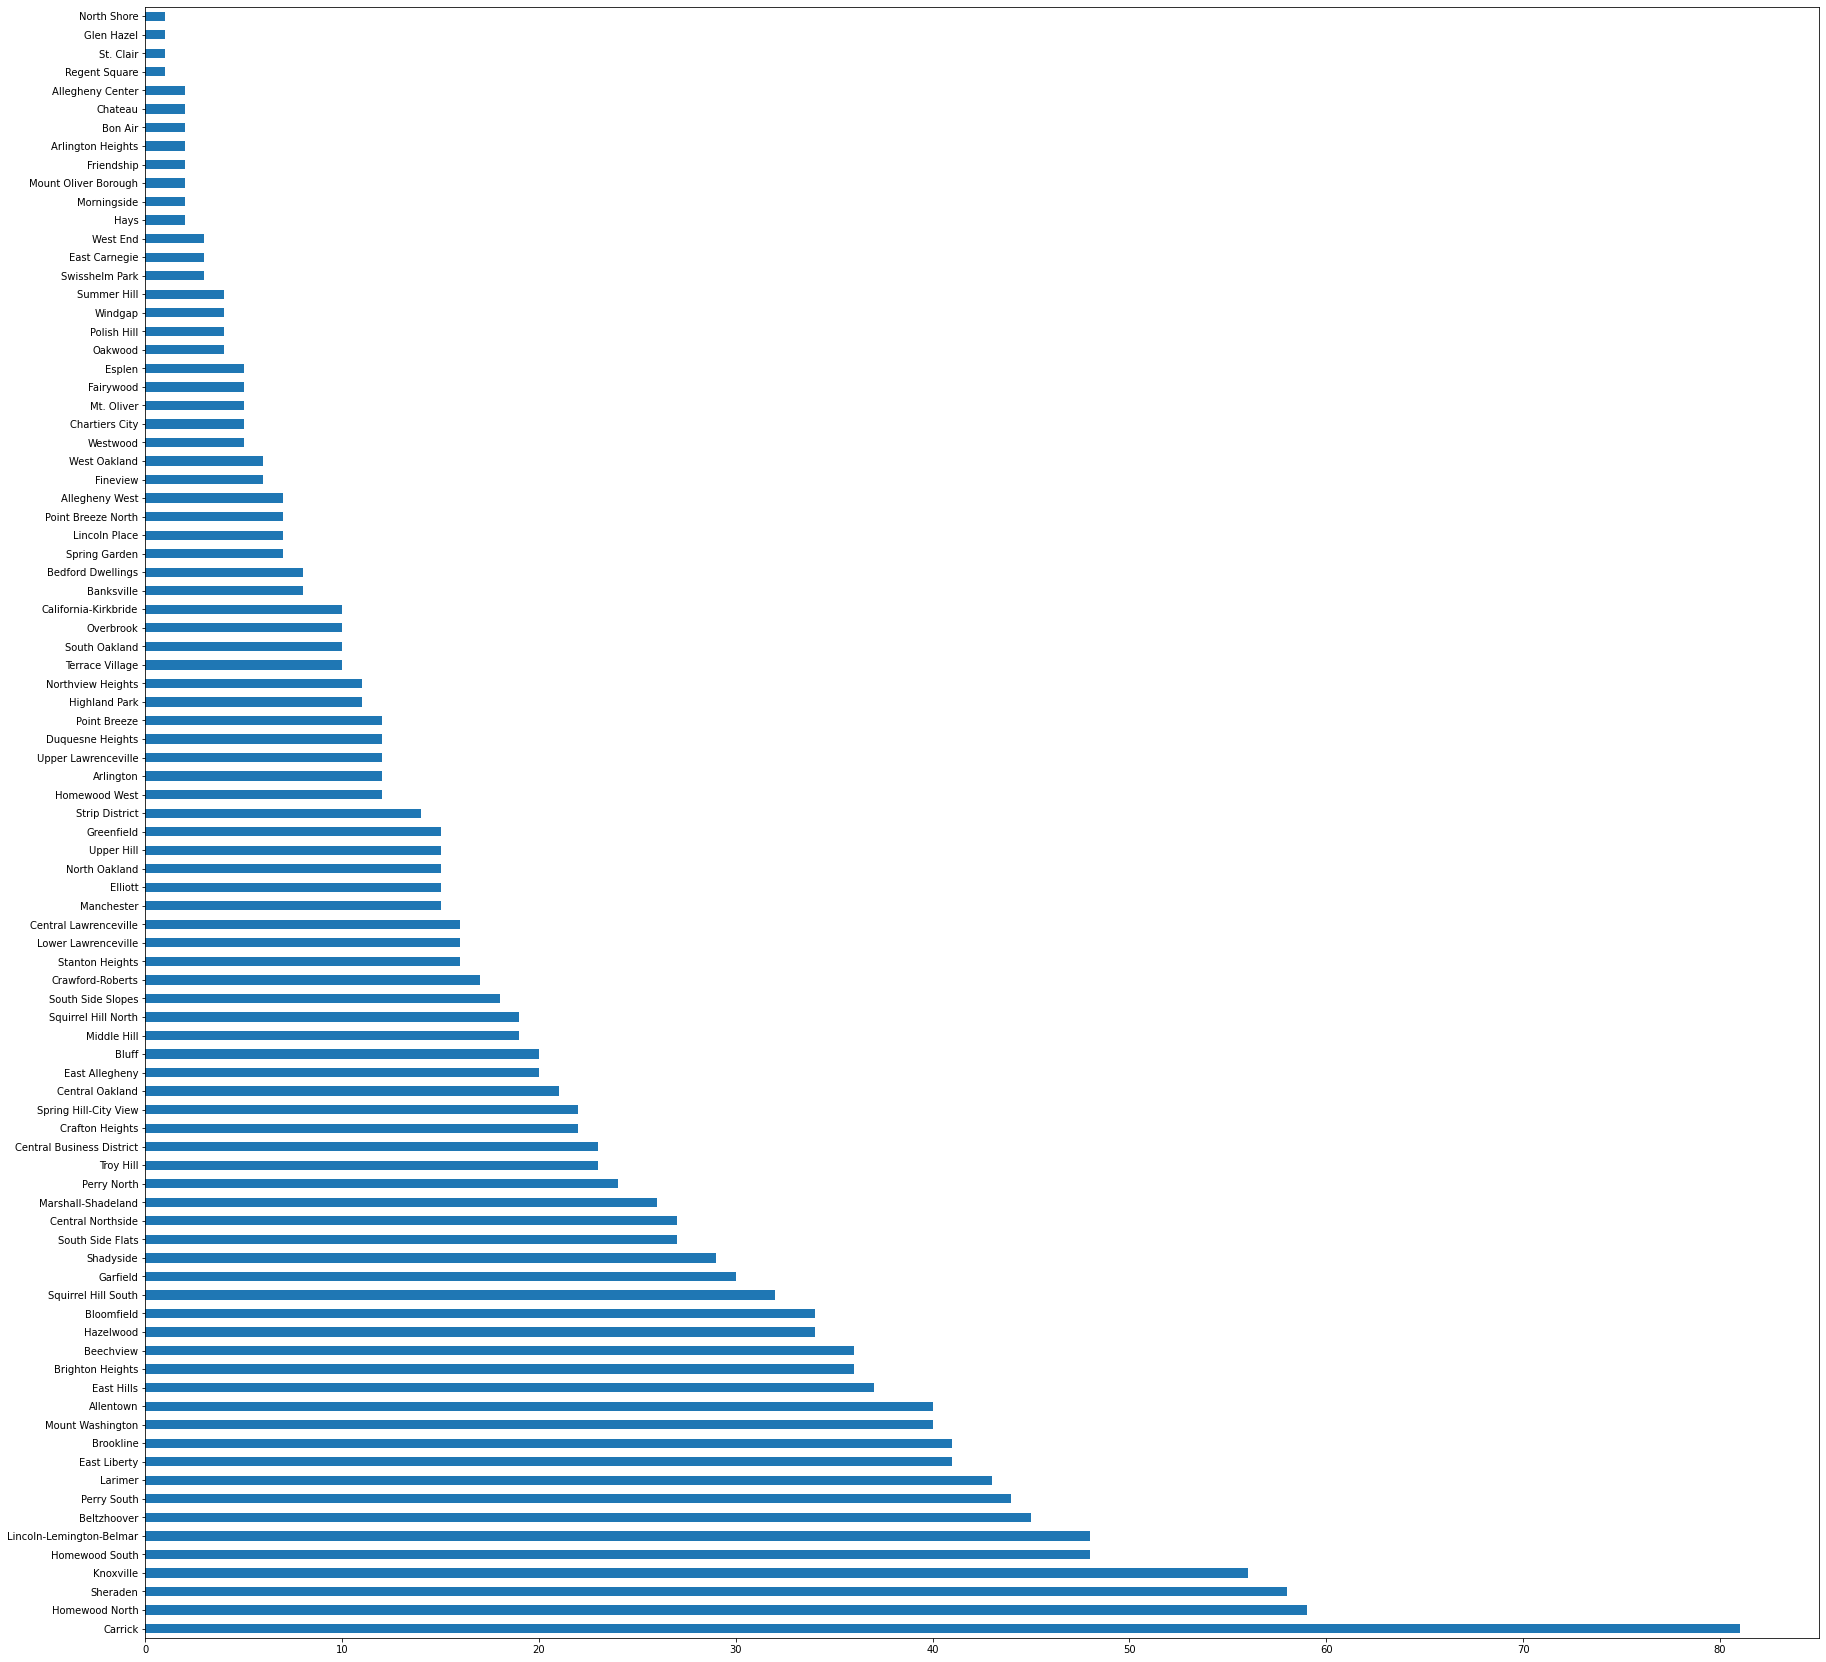

In [159]:
#create a query that pulls only the reported building fires
df2 = df.query('type_description == "Building fire"', inplace=False)
df2['neighborhood'].value_counts().plot.barh(figsize=(30,30))


This second bargraph may have a little more accuracy in terms of safest place to be to avoid fires. That is because I am now only showing the total count of fires that were considered building fires, and thus more hazardous.

In [160]:
#create a df that includes a count column which has the total number of fires per neighborhood (DF will help us later)
df_copy = df.copy()
df_copy['count'] = df.groupby('neighborhood')['neighborhood'].transform('count')

del df_copy['type_description']
df_copy = df_copy.drop_duplicates(subset=['neighborhood'])   
df_copy = df_copy.sort_values('neighborhood')
df_copy.drop
df_copy


,neighborhood,type_description,count
6,Allegheny Center,"Cooking fire, confined to container",60.0
164,Allegheny West,"Commercial Compactor fire, confined to rubbish",42.0
10,Allentown,"Outside rubbish, trash or waste fire",120.0
90,Arlington,"Outside rubbish, trash or waste fire",47.0
1154,Arlington Heights,"Cooking fire, confined to container",13.0
...,...,...,...
246,West End,"Outside rubbish, trash or waste fire",20.0
76,West Oakland,"Cooking fire, confined to container",58.0
311,Westwood,Passenger vehicle fire,25.0
85,Windgap,Garbage dump or sanitary landfill fire,19.0


In [168]:
#create another dataframe that includes only the counts of the fires that were considered building fires
df2_copy = df2.copy()
df2_copy['count'] = df2.groupby('neighborhood')['neighborhood'].transform('count')

del df2_copy['type_description']
df2_copy = df2_copy.drop_duplicates(subset=['neighborhood'])
df2_copy = df2_copy.sort_values('neighborhood')
df2_copy

,neighborhood,type_description,count
1364,Allegheny Center,Building fire,2.0
686,Allegheny West,Building fire,7.0
93,Allentown,Building fire,40.0
1083,Arlington,Building fire,12.0
3711,Arlington Heights,Building fire,2.0
...,...,...,...
2998,West End,Building fire,3.0
2105,West Oakland,Building fire,6.0
1877,Westwood,Building fire,5.0
6069,Windgap,Building fire,4.0


The two newly created dataframes above should have an identical number of rows (one row for each neighborhood), however that is not the case because some neighborhoods reported no building fires, thus our previous query simply did not include those neighborhoods. Therefore, I had to find the differences between the two dataframes or else it will cause problems later...

In [162]:
#figure out which rows are different
print(df_copy['neighborhood'].isin(df2_copy['neighborhood']))               


6       True
164     True
10      True
90      True
1154    True
        ... 
246     True
76      True
311     True
85      True
0       True
Name: neighborhood, Length: 92, dtype: bool


In [169]:
#add in the missing neighborhoods
df2_copy = df2_copy.append({'neighborhood':'New Homestead', 'type_description':'NaN', 'count':0}, ignore_index=True)
df2_copy = df2_copy.append({'neighborhood':'Ridgemont', 'type_description':'NaN', 'count':0}, ignore_index=True)
df2_copy = df2_copy.append({'neighborhood':'South Shore', 'type_description':'NaN', 'count':0}, ignore_index=True)

df2_copy = df2_copy.sort_values('neighborhood')
df2_copy

<ipython-input-169-e5d85b6ea4ea>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_copy = df2_copy.append({'neighborhood':'New Homestead', 'type_description':'NaN', 'count':0}, ignore_index=True)
<ipython-input-169-e5d85b6ea4ea>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_copy = df2_copy.append({'neighborhood':'Ridgemont', 'type_description':'NaN', 'count':0}, ignore_index=True)
<ipython-input-169-e5d85b6ea4ea>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2_copy = df2_copy.append({'neighborhood':'South Shore', 'type_description':'NaN', 'count':0}, ignore_index=True)


,neighborhood,type_description,count
0,Allegheny Center,Building fire,2.0
1,Allegheny West,Building fire,7.0
2,Allentown,Building fire,40.0
3,Arlington,Building fire,12.0
4,Arlington Heights,Building fire,2.0
...,...,...,...
84,West End,Building fire,3.0
85,West Oakland,Building fire,6.0
86,Westwood,Building fire,5.0
87,Windgap,Building fire,4.0


In [164]:
#combine overall count and building fire counts into a single DF
df_copy =df_copy.set_index(df2_copy.index)

df_copy['BF_count'] = df2_copy['count']
df_copy = df_copy.dropna(subset=['neighborhood'])
df_copy

,neighborhood,type_description,count,BF_count
0,Allegheny Center,"Cooking fire, confined to container",60.0,2.0
1,Allegheny West,"Commercial Compactor fire, confined to rubbish",42.0,7.0
2,Allentown,"Outside rubbish, trash or waste fire",120.0,40.0
3,Arlington,"Outside rubbish, trash or waste fire",47.0,12.0
4,Arlington Heights,"Cooking fire, confined to container",13.0,2.0
...,...,...,...,...
83,Upper Lawrenceville,"Special outside fire, Other",49.0,12.0
84,West End,"Outside rubbish, trash or waste fire",20.0,3.0
85,West Oakland,"Cooking fire, confined to container",58.0,6.0
86,Westwood,Passenger vehicle fire,25.0,5.0


0         Text(60.0, 2.0, 'Allegheny Center')
1           Text(42.0, 7.0, 'Allegheny West')
2              Text(120.0, 40.0, 'Allentown')
3               Text(47.0, 12.0, 'Arlington')
4        Text(13.0, 2.0, 'Arlington Heights')
                       ...                   
83    Text(49.0, 12.0, 'Upper Lawrenceville')
84                Text(20.0, 3.0, 'West End')
85            Text(58.0, 6.0, 'West Oakland')
86                Text(25.0, 5.0, 'Westwood')
87                 Text(19.0, 4.0, 'Windgap')
Length: 91, dtype: object

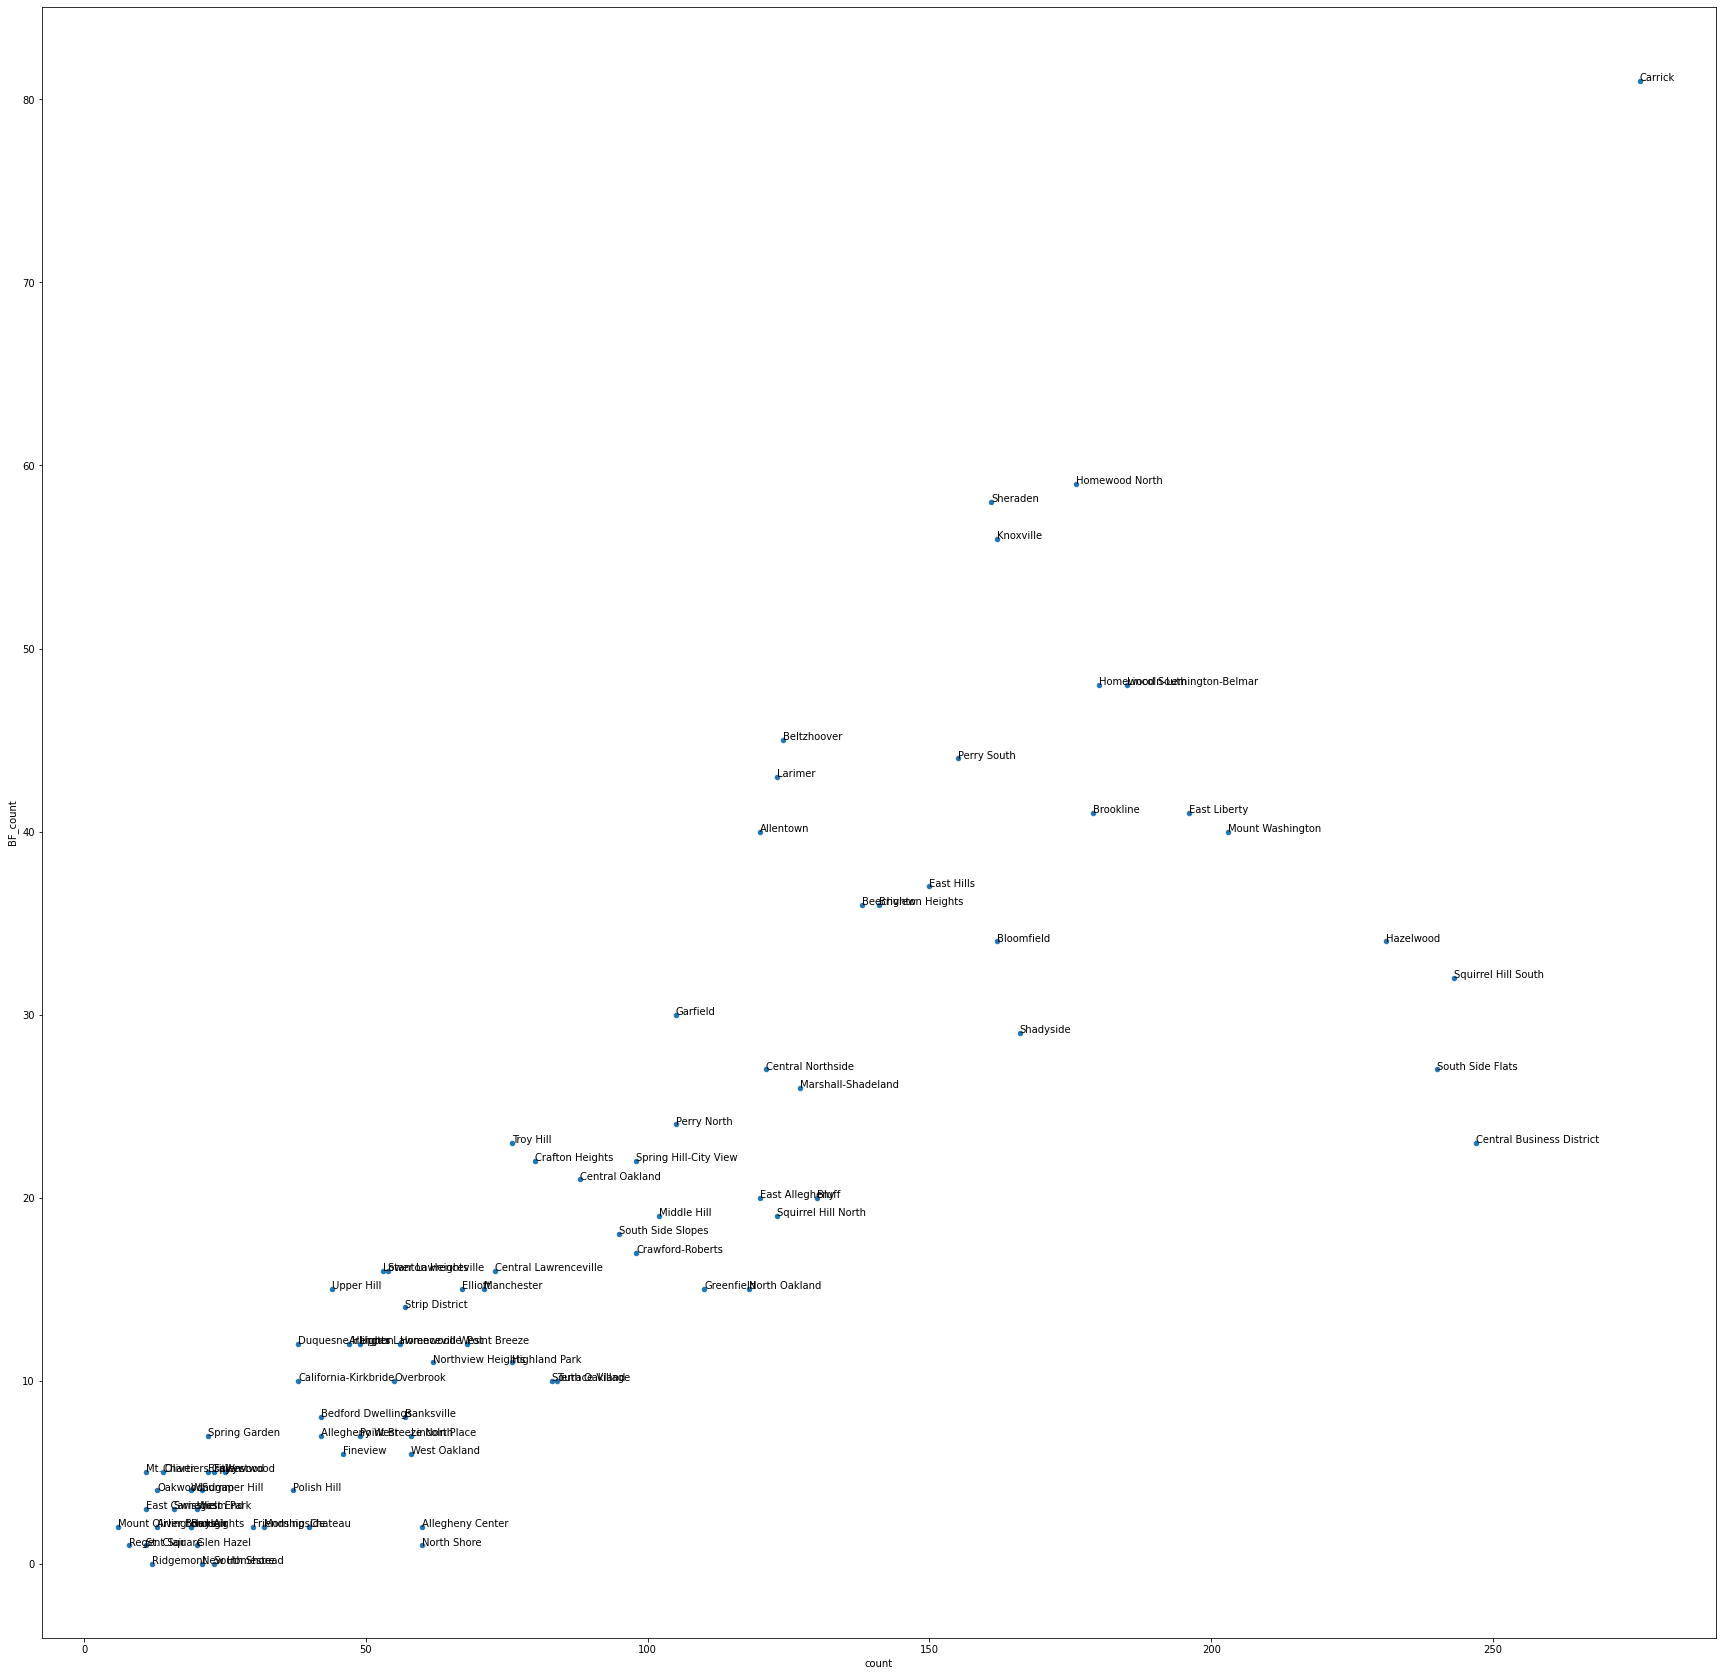

In [165]:
#create scatterplot that compares overall fires to building fires
ax = df_copy.plot(x='count',y='BF_count',kind='scatter',figsize=(30,30))
df_copy[['count','BF_count','neighborhood']].apply(lambda x: ax.text(*x),axis=1)

The above scatterplot provides us a better look at the most fire safe neighborhoods by showing a view of the total number of fires, as well as the number of fires that were considered to be more hazardous. Unfortunately though, since the range is so large, it is hard to see some of the labels, lets fix that!

1           Text(42.0, 7.0, 'Allegheny West')
3               Text(47.0, 12.0, 'Arlington')
4        Text(13.0, 2.0, 'Arlington Heights')
6        Text(42.0, 8.0, 'Bedford Dwellings')
11                 Text(19.0, 2.0, 'Bon Air')
                       ...                   
82             Text(44.0, 15.0, 'Upper Hill')
83    Text(49.0, 12.0, 'Upper Lawrenceville')
84                Text(20.0, 3.0, 'West End')
86                Text(25.0, 5.0, 'Westwood')
87                 Text(19.0, 4.0, 'Windgap')
Length: 35, dtype: object

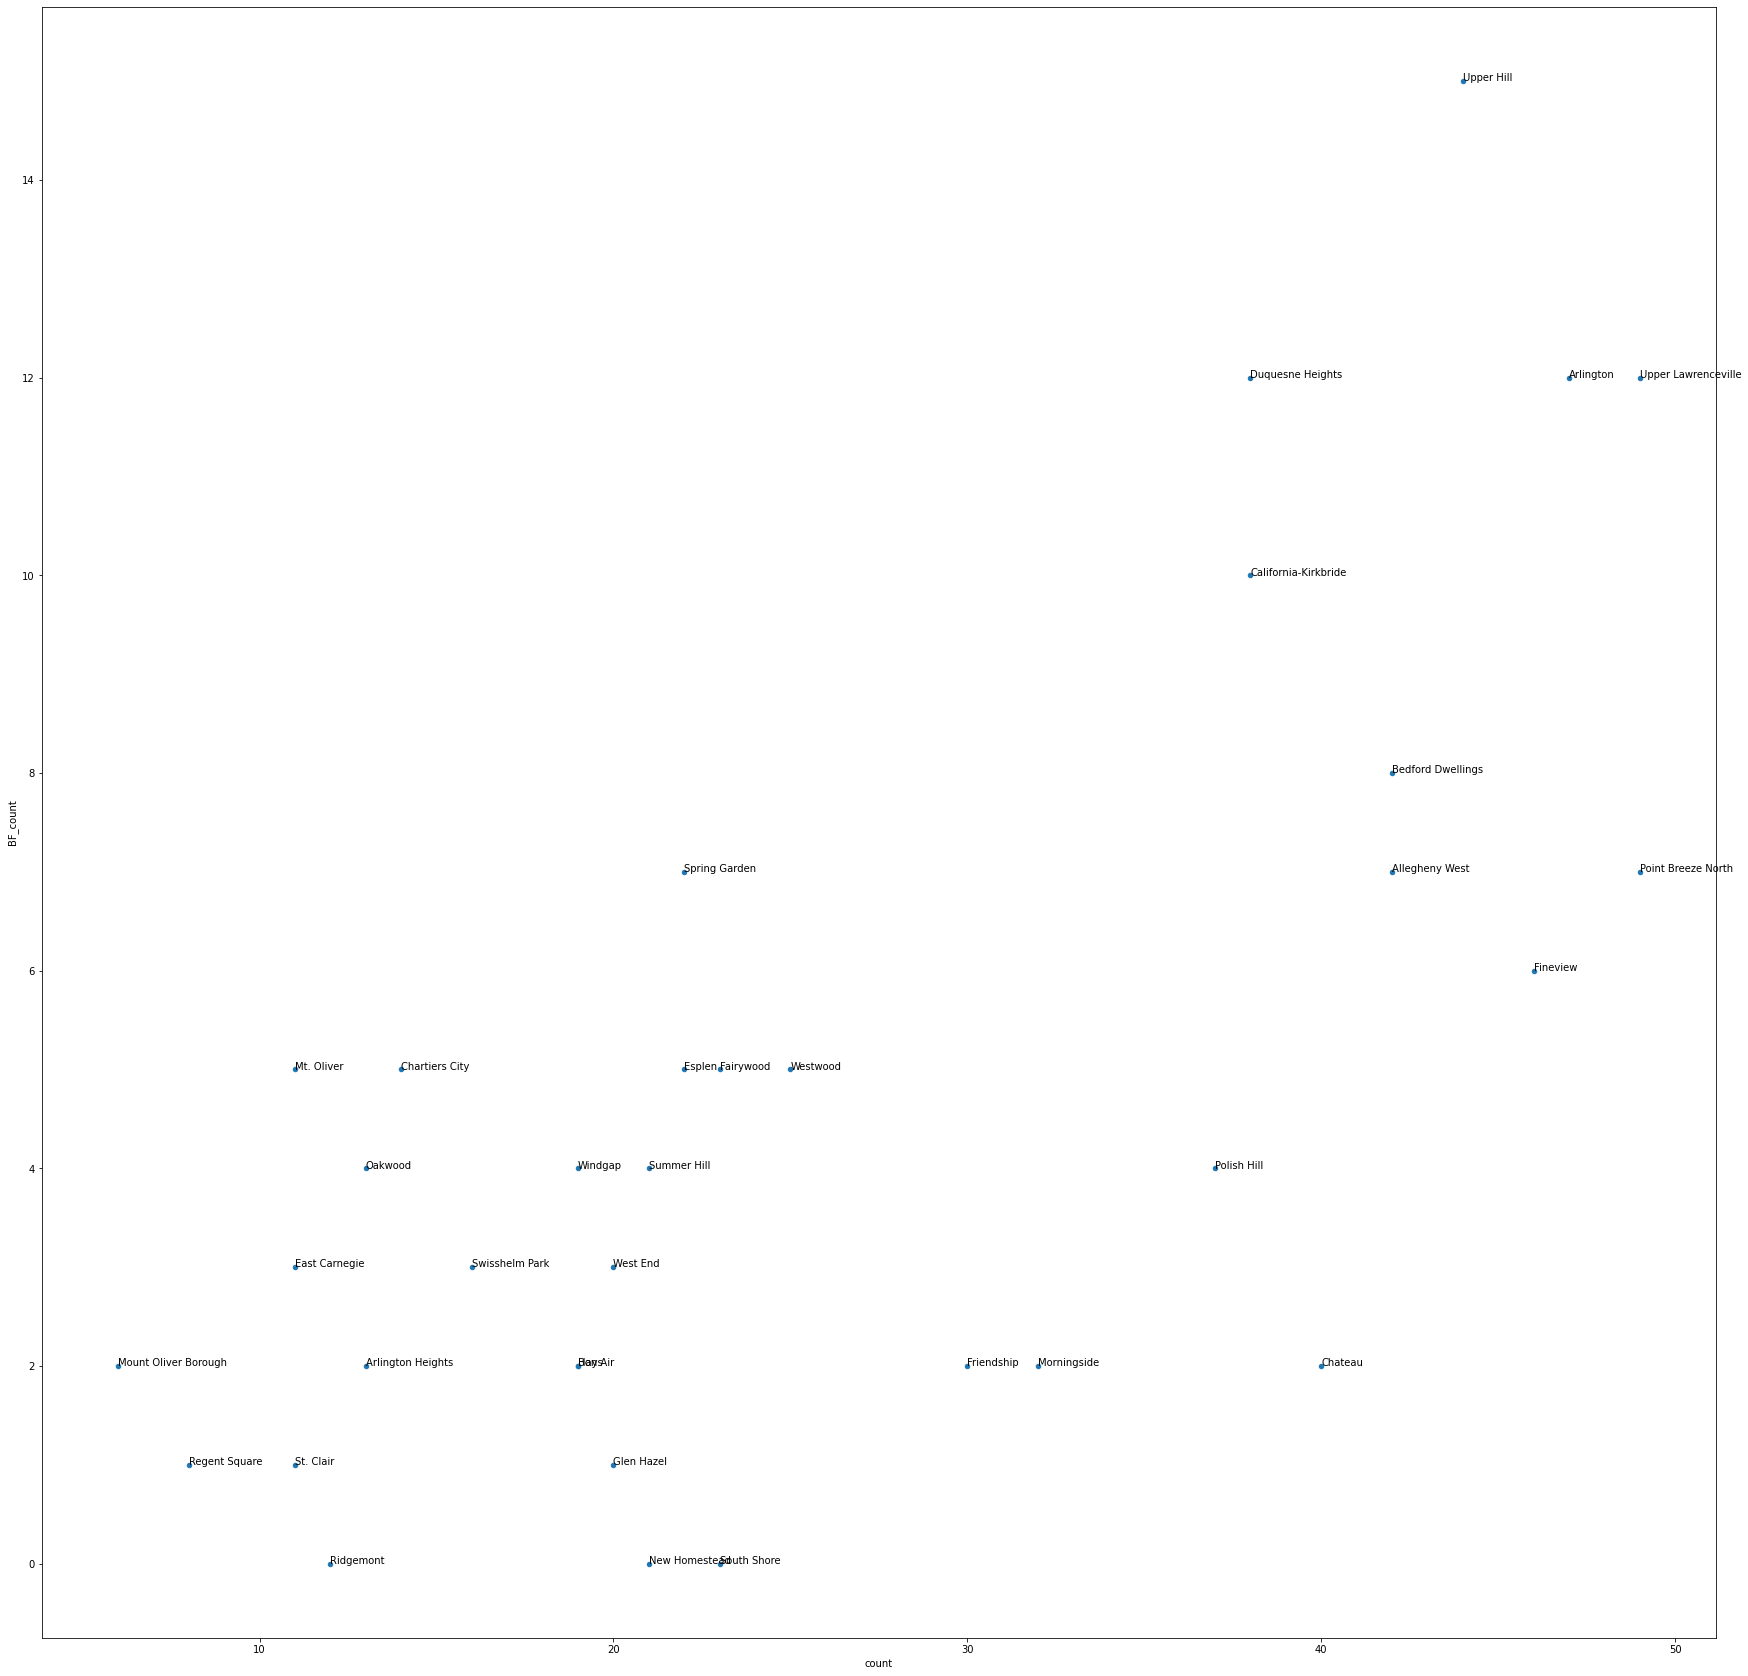

In [166]:
#zoom in
zoom = df_copy.query('count < 50')

ax2 = zoom.plot(x='count',y='BF_count',kind='scatter',figsize=(30,30))
zoom[['count','BF_count','neighborhood']].apply(lambda x: ax2.text(*x),axis=1)

This is the same exact scatterplot as above, however it only shows neighborhoods that have relatively low reported fires, and thus they are all considered potential candidates for best neighborhood in Pittsburgh! However, there are definitely some clear _best_ candidates, as well as _worst_ candidates.

Best Candidates:

1. Regent Square
2. Ridgemont
3. St. Clair
4. Mount Oliver Borough

Worst Candidates:

1. Carrick
2. Homewood North


# Overall Conclusions

In order to find the best neighborhood, we have gathered a list of all the neighborhoods that have made it into our submetrics highest rankings, which happens to be only 2..

neighborhood| Median age |Buildingfires/totalfires| Avg. gun seizures
------------|------------|--------------------------|-----------------|
 Summer Hill |78.3 | 4/22 = .18| TBD|
 West End    |77.5 | 3/20 = .15| TBD|

